This notebook analyses the impact of anthropogenic emissions changes on PM2.5 over Delhi

In [1]:
#import modules
%run ../../load_main.py
from Air_Quality_notebooks import utils as utl
from WRFChemToolkit.analysis import statistics as st, aerosols_202 as aer

# Get model outputs

In [2]:
# Get data
dr='/exports/geos.ed.ac.uk/palmer_group/managed/s1878599/delhiAQ/delhiNCT/outputs_postmon/OAT/'

In [3]:
BASE=xr.open_mfdataset('/exports/geos.ed.ac.uk/palmer_group/managed/s1878599/delhiAQ/delhiNCT/outputs_postmon/pblmincoeff_tests/wrfout_d01_2019-10-*_00:00:00_nest_2019_newdyno_exchmin5.nc')


TRL_x0=xr.open_mfdataset(dr+'wrfout_d01_2019-10-*_00:00:00_OAT_TRL_x0.nc')
TRW_x0=xr.open_mfdataset(dr+'wrfout_d01_2019-10-*_00:00:00_OAT_TRW_x0.nc')
TRH_x0=xr.open_mfdataset(dr+'wrfout_d01_2019-10-*_00:00:00_OAT_TRH_x0.nc')
DST_x0=xr.open_mfdataset(dr+'wrfout_d01_2019-10-*_00:00:00_OAT_DST_x0.nc')
DOM_x0=xr.open_mfdataset(dr+'wrfout_d01_2019-10-*_00:00:00_OAT_DOM_x0.nc')
IPO_x0=xr.open_mfdataset(dr+'wrfout_d01_2019-10-*_00:00:00_OAT_IPO_x0.nc')
TRA_x0=xr.open_mfdataset(dr+'wrfout_d01_2019-10-*_00:00:00_OAT_TRA_x0.nc')

NCR_TRL_x0=xr.open_mfdataset(dr+'wrfout_d01_2019-10-*_00:00:00_OAT_NCR_TRL_x0.nc')
NCR_TRW_x0=xr.open_mfdataset(dr+'wrfout_d01_2019-10-*_00:00:00_OAT_NCR_TRW_x0.nc')
NCR_TRH_x0=xr.open_mfdataset(dr+'wrfout_d01_2019-10-*_00:00:00_OAT_NCR_TRH_x0.nc')
NCR_DST_x0=xr.open_mfdataset(dr+'wrfout_d01_2019-10-*_00:00:00_OAT_NCR_DST_x0.nc')
NCR_DOM_x0=xr.open_mfdataset(dr+'wrfout_d01_2019-10-*_00:00:00_OAT_NCR_DOM_x0.nc')
NCR_IPO_x0=xr.open_mfdataset(dr+'wrfout_d01_2019-10-*_00:00:00_OAT_NCR_IPO_x0.nc')
NCR_TRA_x0=xr.open_mfdataset(dr+'wrfout_d01_2019-10-*_00:00:00_OAT_NCR_TRA_x0.nc')


TRL_x075=xr.open_mfdataset(dr+'wrfout_d01_2019-10-*_00:00:00_OAT_TRL_x0.25.nc')
TRW_x075=xr.open_mfdataset(dr+'wrfout_d01_2019-10-*_00:00:00_OAT_TRW_x0.25.nc')
TRH_x075=xr.open_mfdataset(dr+'wrfout_d01_2019-10-*_00:00:00_OAT_TRH_x0.25.nc')
DST_x075=xr.open_mfdataset(dr+'wrfout_d01_2019-10-*_00:00:00_OAT_DST_x0.25.nc')
DOM_x075=xr.open_mfdataset(dr+'wrfout_d01_2019-10-*_00:00:00_OAT_DOM_x0.25.nc')
IPO_x075=xr.open_mfdataset(dr+'wrfout_d01_2019-10-*_00:00:00_OAT_IPO_x0.25.nc')
TRA_x075=xr.open_mfdataset(dr+'wrfout_d01_2019-10-*_00:00:00_OAT_TRA_x0.25.nc')

NCR_TRL_x075=xr.open_mfdataset(dr+'wrfout_d01_2019-10-*_00:00:00_OAT_NCR_TRL_x0.25.nc')
NCR_TRW_x075=xr.open_mfdataset(dr+'wrfout_d01_2019-10-*_00:00:00_OAT_NCR_TRW_x0.25.nc')
NCR_TRH_x075=xr.open_mfdataset(dr+'wrfout_d01_2019-10-*_00:00:00_OAT_NCR_TRH_x0.25.nc')
NCR_DST_x075=xr.open_mfdataset(dr+'wrfout_d01_2019-10-*_00:00:00_OAT_NCR_DST_x0.25.nc')
NCR_DOM_x075=xr.open_mfdataset(dr+'wrfout_d01_2019-10-*_00:00:00_OAT_NCR_DOM_x0.25.nc')
NCR_IPO_x075=xr.open_mfdataset(dr+'wrfout_d01_2019-10-*_00:00:00_OAT_NCR_IPO_x0.25.nc')
NCR_TRA_x075=xr.open_mfdataset(dr+'wrfout_d01_2019-10-*_00:00:00_OAT_NCR_TRA_x0.25.nc')



In [4]:
#put in a dicitonary
d={ 'BASE': {'BASE':BASE},
    'NCT_TRL':{'x0':TRL_x0,'x075':TRL_x075},
    'NCT_TRW':{'x0':TRW_x0,'x075':TRW_x075},
    'NCT_TRH':{'x0':TRH_x0,'x075':TRH_x075},
    'NCT_DST':{'x0':DST_x0,'x075':DST_x075},
    'NCT_DOM':{'x0':DOM_x0,'x075':DOM_x075},
    'NCT_IPO':{'x0':IPO_x0,'x075':IPO_x075},
    'NCT_TRA':{'x0':TRA_x0,'x075':TRA_x075},
    'NCR_TRL':{'x0':NCR_TRL_x0,'x075':NCR_TRL_x075},
    'NCR_TRW':{'x0':NCR_TRW_x0,'x075':NCR_TRW_x075},
    'NCR_TRH':{'x0':NCR_TRH_x0,'x075':NCR_TRH_x075},
    'NCR_DST':{'x0':NCR_DST_x0,'x075':NCR_DST_x075},
    'NCR_DOM':{'x0':NCR_DOM_x0,'x075':NCR_DOM_x075},
    'NCR_IPO':{'x0':NCR_IPO_x0,'x075':NCR_IPO_x075},
    'NCR_TRA':{'x0':NCR_TRA_x0,'x075':NCR_TRA_x075},    
}

In [5]:
def reset_time_dim(ds):
    """
    Time dimension in WRF-Chem datasets is just the time index [0,1,2,3...].
    This function convert dimension Time as datetime[64].
    :param ds:
     wrf-chem xarray dataset.
    :type ds:xarray.Dataset.
    :return:
     xarray.Dataset with datetime time dim.
    :rtype: xarray.Dataset.
    """
    return ds.assign_coords(Time=pd.to_datetime(ds.XTIME.values))

In [6]:
# reset time put in local time and discard 5 days spinup.
for k in d.keys():
    for v in d[k].keys():
        d[k][v]=reset_time_dim(d[k][v])  # reset
        d[k][v]=d[k][v].assign_coords(Time=pd.to_datetime(d[k][v].Time.to_index().tz_localize('UTC').tz_convert('Asia/Kolkata').strftime('%Y-%m-%d %H:%M:%S')))
        d[k][v].XTIME.values=d[k][v].Time.values
        d[k][v]=d[k][v].sel(Time=slice('2019-10-06T00:00:00.000000000','2019-10-14T23:30:00.000000000'))  # discad spinup

In [7]:
d['BASE']['BASE']['PM2_5_DRY'].XTIME.values.max()

numpy.datetime64('2019-10-14T23:30:00.000000000')

In [8]:
d['NCT_TRL']['x075'].XTIME.values.min()

numpy.datetime64('2019-10-06T00:30:00.000000000')

In [9]:
# subset surface values of relevant pollutants.

def get_pollutants(ds):
    
    data ={ 
           "pm25" : (['time',"lat","lon"], ds.PM2_5_DRY.values[:,0,:,:]),             
          }
    coords={'time': (['time'], ds.XTIME[:]),'lat': (['lat'], ds.XLAT[0,:,0]), 'lon': (['lon'], ds.XLONG[0,0,:])}
    p = xr.Dataset(data, coords=coords)
    return p


In [10]:
mod={}
for k in d.keys():
    if k=='BASE':
        mod[k]={'BASE': get_pollutants(d[k]['BASE'])}
    
    else:
        mod[k]={'x0': get_pollutants(d[k]['x0']),'x075':get_pollutants(d[k]['x075'])}

# 24-h PM2.5 average

In [11]:
mod24={}

for k in mod.keys():
    if k=='BASE':
        mod24[k]={k: mod[k]['BASE'].resample(time='1D').mean(dim='time')}
    
    else:
        mod24[k]={'x0': mod[k]['x0'].resample(time='1D').mean(dim='time'),
                  'x075': mod[k]['x075'].resample(time='1D').mean(dim='time')}


# Extract Delhi NCT data only

In [12]:
# WITH SHAPE FILE OF NCT (FOR STATISTICS) and average over space

In [13]:
from WRFChemToolkit.analysis import aerosols_202 as aer, plots as pt, statistics as st
import salem
shp = '/exports/csce/datastore/geos/users/s1878599/phd_work/DelhiNCT/gadm_data/delhiNCT/delhiNCT.shp'

nct={}

for k in mod24.keys():
    if k=='BASE':
        nct[k]={'BASE': mod24[k]['BASE'].salem.roi(shape=shp).mean(dim=['time','lat','lon']).pm25.values}
    
    else:
        nct[k]={'x0': mod24[k]['x0'].salem.roi(shape=shp).mean(dim=['time','lat','lon']).pm25.values,
                'x075':mod24[k]['x075'].salem.roi(shape=shp).mean(dim=['time','lat','lon']).pm25.values}

In [14]:
nct['NCT_TRA']['x075']

array(86.298996, dtype=float32)

# Impact

In [15]:
mains=['NCT_TRA','NCT_DOM','NCT_IPO','NCR_TRA','NCR_DOM','NCR_IPO']

In [16]:
imp0={}

for p in (mains):
    if p !='BASE':
        imp0.update({p: (nct[p]['x0']-nct['BASE']['BASE'])/(1*nct['BASE']['BASE'])*100})
    else:
        imp0.update({p: nct['BASE']['BASE']})

In [17]:
imp75={}

for p in (mains):
    if p !='BASE':
        imp75.update({p: (nct[p]['x075']-nct['BASE']['BASE'])/(0.75*nct['BASE']['BASE'])*100})
    else:
        imp75.update({p: nct['BASE']['BASE']})

In [18]:
# check imapcts are the same as calculated at x0 and at x075

In [19]:
imp0

{'NCT_TRA': -8.910460577448859,
 'NCT_DOM': -1.7626455029502779,
 'NCT_IPO': -5.6822751680862265,
 'NCR_TRA': -6.887295310454982,
 'NCR_DOM': -11.36763618574181,
 'NCR_IPO': -14.095428457869307}

In [20]:
imp75

{'NCT_TRA': -9.225872805120918,
 'NCT_DOM': -1.7642611166359248,
 'NCT_IPO': -5.676416168370536,
 'NCR_TRA': -7.703136334068314,
 'NCR_DOM': -11.358373151078943,
 'NCR_IPO': -13.78509622433276}

# Plots

In [21]:
imp75.values()

dict_values([-9.225872805120918, -1.7642611166359248, -5.676416168370536, -7.703136334068314, -11.358373151078943, -13.78509622433276])

In [22]:
import matplotlib.pyplot as plt

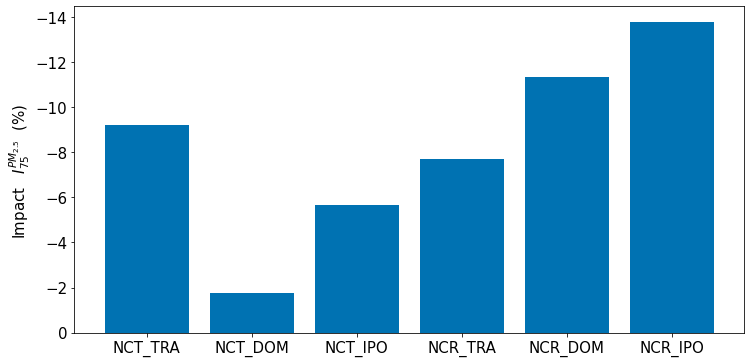

In [23]:
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(imp75.keys(),imp75.values(),color='#0072B2')
ax.set_xticklabels(imp0.keys())
#aqg = [15]
#it1=[75]
left, right = plt.xlim()
#plt.hlines(aqg, xmin=left, xmax=right, color='r', linestyles='-',label='WHO AQG')
#plt.hlines(it1, xmin=left, xmax=right, color='r', linestyles='--',label='interim target 1')
#plt.annotate('AQG WHO', xy=(0.85,0.07), xycoords='axes fraction',color='r',)
#plt.annotate('interim target 1', xy=(1.01,0.07), xycoords='axes fraction',color='r')
ax.tick_params(axis='both', which='major', labelsize=15)
plt.ylabel("Impact   $I^{PM_{2.5}}_{75}$  (%) ",fontsize=15)
plt.gca().invert_yaxis()

In [24]:
#fig.savefig('./fig05a.png', format='png', dpi=300)

In [25]:
list(imp75.values())

[-9.225872805120918,
 -1.7642611166359248,
 -5.676416168370536,
 -7.703136334068314,
 -11.358373151078943,
 -13.78509622433276]

Text(0.5, 0, 'Impact on $PM_{2.5}$ (%) ')

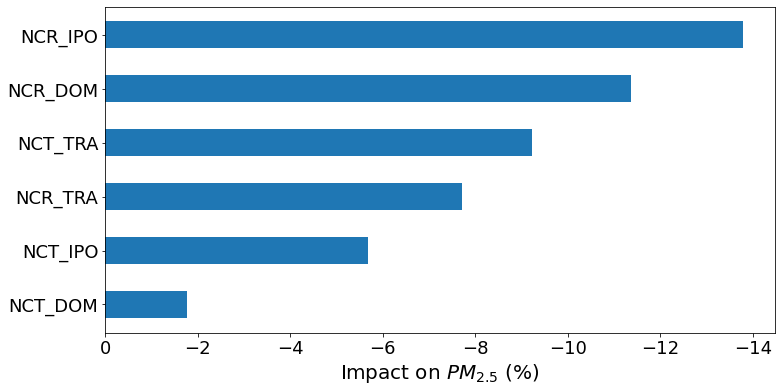

In [26]:
fig, ax = plt.subplots(figsize=(12,6))

imp75s=dict(sorted(imp75.items(), key=lambda item: item[1], reverse=True))
ax.barh(list(imp75s.keys()),imp75s.values(),align='center',height=0.5)
#ax.set_xticklabels(np.arange(0,15))
#aqg = [15]
#it1=[75]
left, right = plt.xlim()
#plt.hlines(aqg, xmin=left, xmax=right, color='r', linestyles='-',label='WHO AQG')
#plt.hlines(it1, xmin=left, xmax=right, color='r', linestyles='--',label='interim target 1')
#plt.annotate('AQG WHO', xy=(0.85,0.07), xycoords='axes fraction',color='r',)
#plt.annotate('interim target 1', xy=(1.01,0.07), xycoords='axes fraction',color='r')
ax.tick_params(axis='both', which='major', labelsize=18)
ax.invert_xaxis() 
plt.xlabel("Impact on $PM_{2.5}$ (%) ",fontsize=20) #"Impact   $I^{PM_{2.5}}_{75}$  (%)
#plt.gca().invert_yaxis()

#rounded = [round(num,2) for num in list(imp75.values())]
##for i, v in enumerate(rounded):
#    ax.text(v-0.25, i +0, str(v), color='red', fontweight='bold',fontsize=15)

In [27]:
rounded = [round(num,2) for num in list(imp75.values())]

In [28]:
rounded

[-9.23, -1.76, -5.68, -7.7, -11.36, -13.79]

In [29]:
# impact effect on total PM2.5

In [30]:
absimp0={}

for p in (mains+['BASE']):
    if p !='BASE':
        absimp0.update({p: nct[p]['x0']/1})
    else:
        absimp0.update({p: nct['BASE']['BASE']/1})

In [31]:
absimp75={}

for p in (['BASE']+mains):
    if p !='BASE':
        absimp75.update({p: (nct[p]['x075']-(1-0.75)*nct['BASE']['BASE'])/0.75}) # i.e base + impact(in ug m-3) (impact has laready the right sign)
    else:
        absimp75.update({p: nct['BASE']['BASE']/1})

In [32]:
absimp0

{'NCT_TRA': 84.4530029296875,
 'NCT_DOM': 91.08004760742188,
 'NCT_IPO': 87.44599151611328,
 'NCR_TRA': 86.32876586914062,
 'NCR_DOM': 82.17485046386719,
 'NCR_IPO': 79.64579772949219,
 'BASE': 92.71427154541016}

In [33]:
absimp75

{'BASE': 92.71427154541016,
 'NCT_TRA': 84.1605707804362,
 'NCT_DOM': 91.07854970296223,
 'NCT_IPO': 87.45142364501953,
 'NCR_TRA': 85.5723648071289,
 'NCR_DOM': 82.18343861897786,
 'NCR_IPO': 79.9335199991862}

Text(0, 0.5, '24h PM$_{2.5}$ average ($\\mu g~m^{-3}$)')

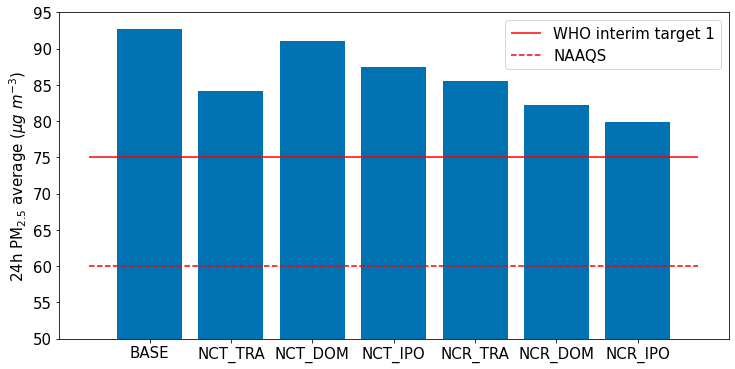

In [34]:
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(absimp75.keys(),absimp75.values(), color='#0072B2')
ax.set_xticklabels(absimp75.keys())
aqg = [15]
ind = [60]
it1=[75]
left, right = plt.xlim()
#plt.hlines(aqg, xmin=left, xmax=right, color='r', linestyles=':',label='WHO AQG')
plt.hlines(it1, xmin=left, xmax=right, color='r', linestyles='-',label='WHO interim target 1')
plt.hlines(ind, xmin=left, xmax=right, color='r', linestyles='--',label='NAAQS')
#plt.annotate('AQG WHO', xy=(0.85,0.07), xycoords='axes fraction',color='r',)
#plt.annotate('interim target 1', xy=(1.01,0.07), xycoords='axes fraction',color='r')
#plt.legend(loc='left', bbox_to_anchor=(1, 0.95)
plt.legend(fontsize=15)
plt.ylim([50, 95])
ax.tick_params(axis='both', which='major', labelsize=15)
plt.ylabel("24h PM$_{2.5}$ average ($\mu g~m^{-3}$)", fontsize=15)

In [35]:
#fig.savefig('./fig05c.png', format='png', dpi=300)

In [36]:
# TRANSPORT SUBSECTORS

In [37]:
partra=['NCT_TRA','NCT_TRL','NCT_TRW','NCT_TRH','NCT_DST','NCR_TRA','NCR_TRL','NCR_TRW','NCR_TRH','NCR_DST']

In [38]:
traimp75={}

for p in (partra):
        traimp75.update({p: (nct[p]['x075']-nct['BASE']['BASE'])/0.75}) 

In [39]:
traimp75

{'NCT_TRA': -8.553700764973959,
 'NCT_TRL': -1.0258687337239583,
 'NCT_TRW': -3.9947509765625,
 'NCT_TRH': -2.8046366373697915,
 'NCT_DST': -0.7627054850260416,
 'NCR_TRA': -7.14190673828125,
 'NCR_TRL': -0.7060546875,
 'NCR_TRW': -3.719329833984375,
 'NCR_TRH': -1.9036356608072917,
 'NCR_DST': -0.61968994140625}

In [40]:
traimp75['NCT_TRA']+traimp75['NCR_TRA']

-15.695607503255209

In [41]:
traimp75['NCT_TRL']+traimp75['NCR_TRL']+traimp75['NCT_TRW']+traimp75['NCR_TRW']+traimp75['NCT_TRH']+traimp75['NCR_TRH']+traimp75['NCT_DST']+traimp75['NCR_DST']

-15.536671956380205

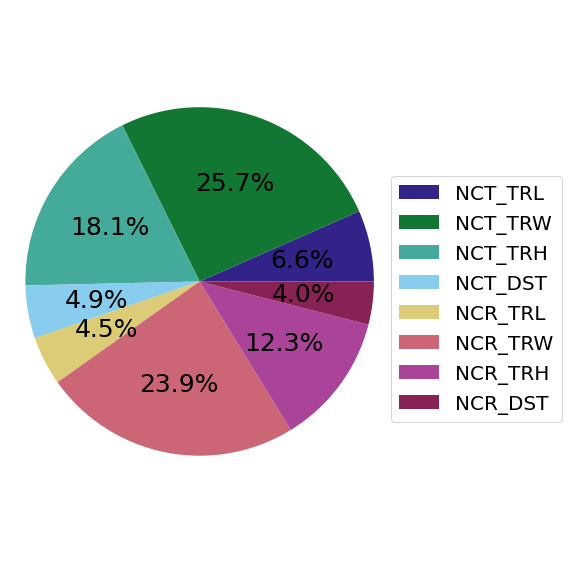

In [42]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:

colors=['#332288','#117733','#44AA99','#88CCEE','#DDCC77','#CC6677','#AA4499','#882255']
labels=['NCT_TRL','NCT_TRW','NCT_TRH','NCT_DST','NCR_TRL','NCR_TRW','NCR_TRH','NCR_DST']

data = [-traimp75['NCT_TRL'],
         -traimp75['NCT_TRW'],
         -traimp75['NCT_TRH'],
         -traimp75['NCT_DST'],
         -traimp75['NCR_TRL'],
         -traimp75['NCR_TRW'],
         -traimp75['NCR_TRH'],
         -traimp75['NCR_DST']
        ]

fig1, ax1 = plt.subplots(figsize=[8,8])
ax1.pie(data, colors=colors,autopct='%1.1f%%', textprops={'fontsize': 25},)
plt.legend(fontsize = 20, loc=[1,0.25],labels=labels)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#ax1.set_title('transport impact share',fontsize=25)  #tot: -15.54 $\mu g~m^{-3}$
plt.tight_layout()

In [43]:
#fig1.savefig('./fig05b.png', format='png', box_inches="tight",dpi=300)

Text(0.5, 0, 'Impact on $PM_{2.5}$ (%) ')

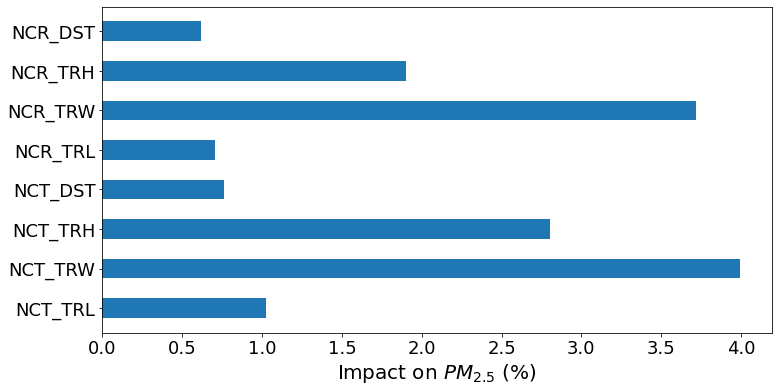

In [44]:
fig, ax = plt.subplots(figsize=(12,6))


data = [-traimp75['NCT_TRL'],
         -traimp75['NCT_TRW'],
         -traimp75['NCT_TRH'],
         -traimp75['NCT_DST'],
         -traimp75['NCR_TRL'],
         -traimp75['NCR_TRW'],
         -traimp75['NCR_TRH'],
         -traimp75['NCR_DST']
        ]

labels=['NCT_TRL','NCT_TRW','NCT_TRH','NCT_DST','NCR_TRL','NCR_TRW','NCR_TRH','NCR_DST']

ax.barh(labels,data,align='center',height=0.5)
#ax.set_xticklabels(np.arange(0,15))
#aqg = [15]
#it1=[75]
left, right = plt.xlim()
#plt.hlines(aqg, xmin=left, xmax=right, color='r', linestyles='-',label='WHO AQG')
#plt.hlines(it1, xmin=left, xmax=right, color='r', linestyles='--',label='interim target 1')
#plt.annotate('AQG WHO', xy=(0.85,0.07), xycoords='axes fraction',color='r',)
#plt.annotate('interim target 1', xy=(1.01,0.07), xycoords='axes fraction',color='r')
ax.tick_params(axis='both', which='major', labelsize=18)
#ax.invert_xaxis() 
plt.xlabel("Impact on $PM_{2.5}$ (%) ",fontsize=20) #"Impact   $I^{PM_{2.5}}_{75}$  (%)
#plt.gca().invert_yaxis()

#rounded = [round(num,2) for num in list(imp75.values())]
##for i, v in enumerate(rounded):
#    ax.text(v-0.25, i +0, str(v), color='red', fontweight='bold',fontsize=15)

# Dyno cycle impact

In [45]:
def dyno_pm25(ds):
    """get dyno cycle of pm25 for a dataset"""
    df= ds.to_dataframe().reset_index()
    df['hour'] = df['time'].dt.hour
    df=df.groupby(['lat','lon','hour']).agg({'mean'})['pm25'].add_prefix('pm25' + "_").to_xarray()
    return df

In [46]:
nct2={}

for k in mod.keys():
    if k=='BASE':
        nct2[k]={'BASE': mod[k]['BASE'].salem.roi(shape=shp)}
    
    else:
        nct2[k]={'x0': mod[k]['x0'].salem.roi(shape=shp),
                'x075':mod[k]['x075'].salem.roi(shape=shp)}

In [47]:
# get dyno data

nct_dyno={}
for k in nct2.keys():
    if k=='BASE':
        nct_dyno[k]={'BASE': dyno_pm25(nct2['BASE']['BASE']).mean(['lat','lon'])}
    
    else:
        nct_dyno[k]={'x0': dyno_pm25(nct2[k]['x0']).mean(['lat','lon']),
                     'x075':dyno_pm25(nct2[k]['x075']).mean(['lat','lon'])}

In [48]:
imp024={}

for p in (mains):
        imp024.update({p: (nct_dyno[p]['x0']-nct_dyno['BASE']['BASE'])/(1*nct['BASE']['BASE'])*100})

In [49]:
imp7524={}

for p in (mains):
        imp7524.update({p: (nct_dyno[p]['x075']-nct_dyno['BASE']['BASE'])/(0.75*nct['BASE']['BASE'])*100})

## Plots

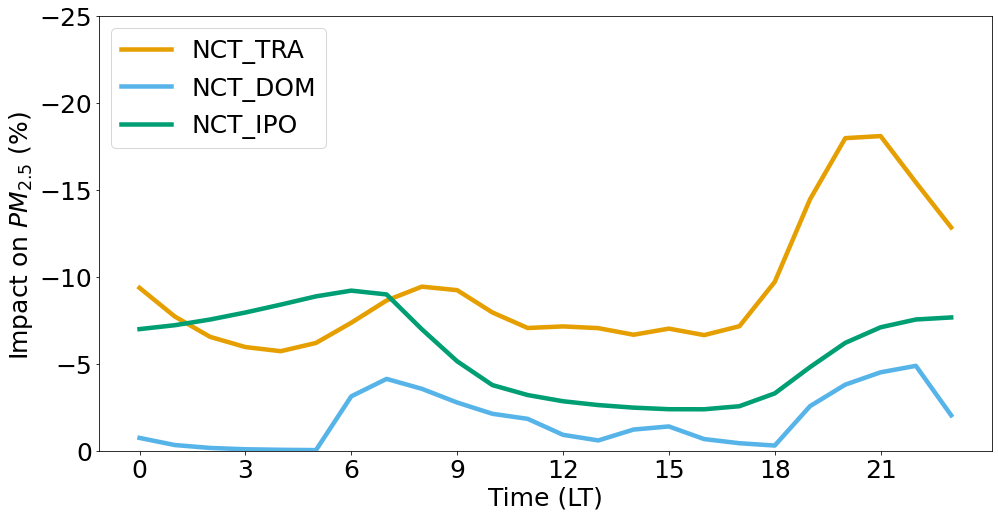

In [50]:
# NCT sectors

import matplotlib.pyplot as plt

colorsNCT=["#E69F00","#56B4E9","#009E73"] 
                                                        

fig, ax = plt.subplots(figsize=(16,8))

hours= imp7524['NCT_TRA']['hour']

for k,v in zip(['NCT_TRA','NCT_DOM','NCT_IPO'],colorsNCT): #'TRA','DOM','IPO'
        ax.plot(hours,imp7524[k]['pm25_mean'], label = k, linewidth=4.5, color=v)
         
        
ax.tick_params(axis='both', which='major', labelsize=25)
ax.set_ylim([0, -25])   

plt.xticks(np.arange(0, 23+1, 3.0))
plt.xlabel("Time (LT)", fontsize=25)
plt.ylabel("Impact on $PM_{2.5}}$ (%) ",fontsize=25) #"Impact   $I^{PM_{2.5}}_{75}$  (%) "
plt.legend(fontsize=25)
 
#plt.gca().invert_yaxis()

  

In [51]:
#fig.savefig('./fig06a.png', format='png', box_inches="tight",dpi=300)

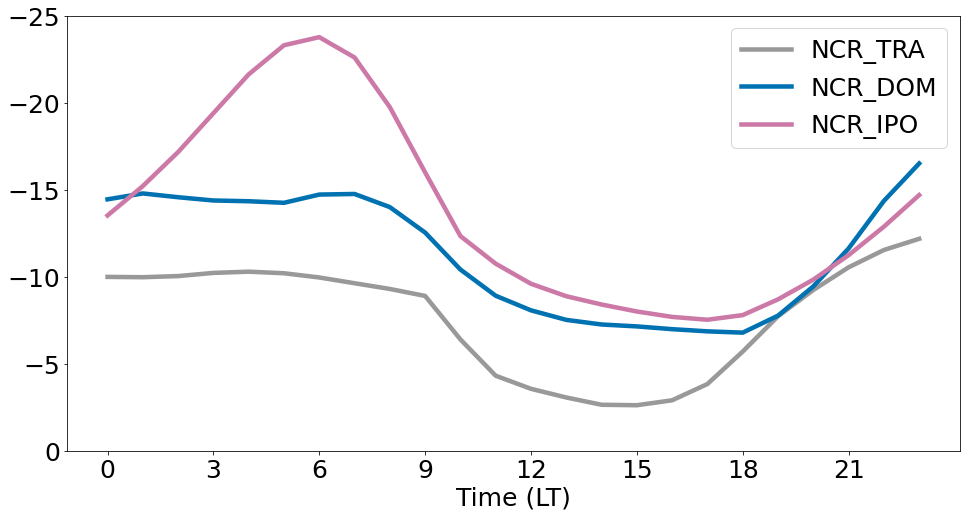

In [52]:
# NCR sectors
colorsNCR=["#999999", "#0072B2", "#CC79A7"] 
                                                                 

fig, ax = plt.subplots(figsize=(16,8))

hours= imp7524['NCT_TRA']['hour']

for k,v in zip(['NCR_TRA','NCR_DOM','NCR_IPO'],colorsNCR): #'TRA','DOM','IPO'
        ax.plot(hours,imp7524[k]['pm25_mean'], label = k, linewidth=4.5, color=v)
         
        
ax.tick_params(axis='both', which='major', labelsize=25)
ax.set_ylim([0, -25])   

plt.xticks(np.arange(0, 23+1, 3.0))
plt.xlabel("Time (LT)", fontsize=25)
#plt.ylabel("Impact on $PM_{2.5}}$ (%) ",fontsize=25) #"Impact   $I^{PM_{2.5}}_{75}$  (%) "
plt.legend(fontsize=25)
 
#plt.gca().invert_yaxis()

 

In [53]:
#fig.savefig('./fig06b.png', format='png', box_inches="tight",dpi=300)

In [54]:
# transport subsectors (impact as share of transport impact)

In [55]:
# percent impact
traimp7524={}

for p in (partra):
        traimp7524.update({p: (nct_dyno[p]['x075']-nct_dyno['BASE']['BASE'])/(0.75*nct['BASE']['BASE'])*100})

In [56]:
# absolute impact
traimp7524_abs={}

for p in (partra):
        traimp7524_abs.update({p: (nct_dyno[p]['x075']-nct_dyno['BASE']['BASE'])/(0.75)})

In [57]:
# tra subsectors percent impact of total transport impact

trsub=['NCT_TRL','NCT_TRW','NCT_TRH','NCT_DST','NCR_TRL','NCR_TRW','NCR_TRH','NCR_DST']

tottra=(traimp7524_abs['NCT_TRL']+traimp7524_abs['NCT_TRH']+traimp7524_abs['NCT_TRW']+traimp7524_abs['NCT_DST']+
        traimp7524_abs['NCR_TRL']+traimp7524_abs['NCR_TRH']+traimp7524_abs['NCR_TRW']+traimp7524_abs['NCR_DST'])

traimp7524_p={}

for p in (trsub):
   
    traimp7524_p.update({p: (traimp7524_abs[p]/tottra)*100})

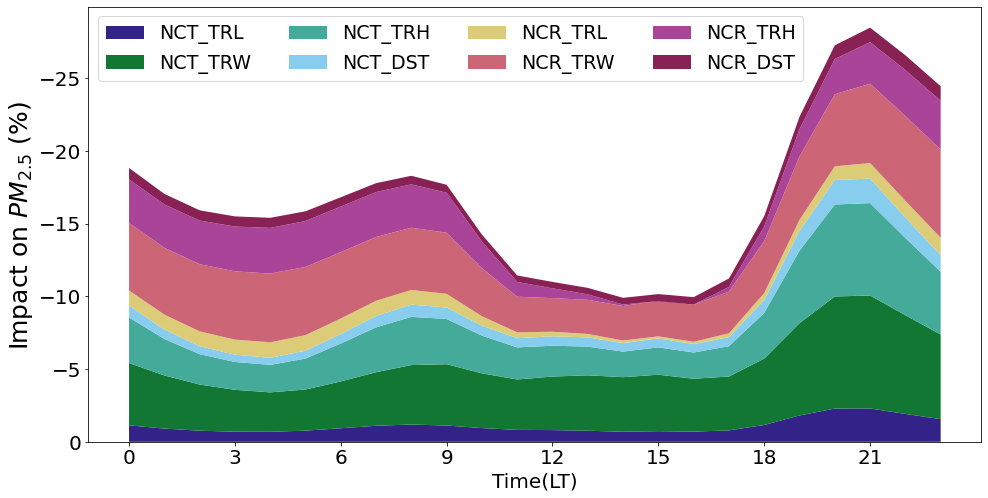

In [58]:
fig, ax = plt.subplots(figsize=(16,8))

hours= imp7524['NCT_TRA']['hour']

colors=['#332288','#117733','#44AA99','#88CCEE','#DDCC77','#CC6677','#AA4499','#882255']
labels=['NCT_TRL','NCT_TRW','NCT_TRH','NCT_DST','NCR_TRL','NCR_TRW','NCR_TRH','NCR_DST']
data=[]
for k in trsub:
    data.append(traimp7524[k]['pm25_mean'])


ax.stackplot(hours,data,baseline='zero',labels=trsub,colors=colors)
         
ax.tick_params(axis='both', which='major', labelsize=20)        
#ax.set_ylim([0, -100])   

plt.xticks(np.arange(0, 23+1, 3.0))
plt.xlabel("Time(LT)", fontsize=20)
plt.ylabel("Impact on $PM_{2.5}}$ (%) ",fontsize=25)
#plt.ylabel("Impact   $I^{PM_{2.5}}_{75}$  (%) ",fontsize=20)
plt.legend(fontsize=19,ncol=4, loc='upper left')
 
plt.gca().invert_yaxis()

  

In [59]:
#fig.savefig('./fig06c.png', format='png', box_inches="tight",dpi=300)

Text(0, 0.5, 'share of total transport impact (%)')

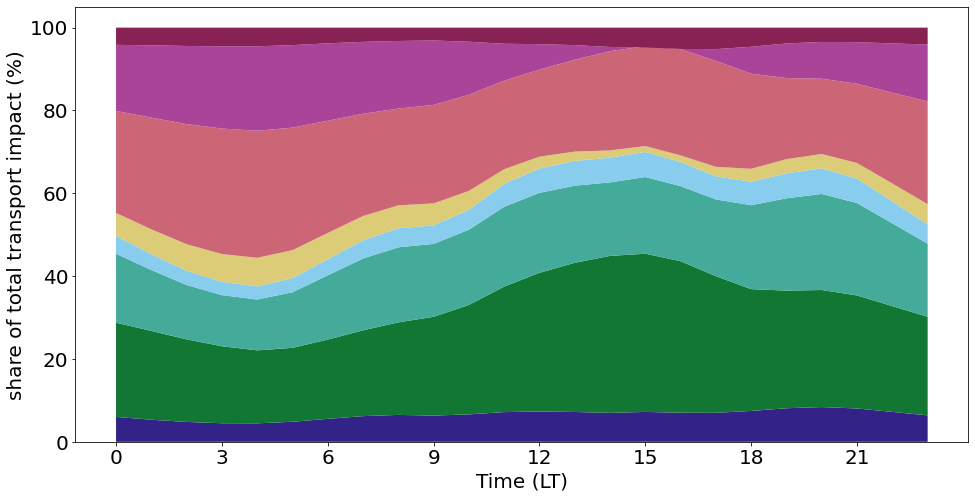

In [60]:
# percentage share
fig, ax = plt.subplots(figsize=(16,8))

hours= imp7524['NCT_TRA']['hour']

data=[]
for k in trsub:
    data.append(traimp7524_p[k]['pm25_mean'])


ax.stackplot(hours,data,baseline='zero',labels=trsub,colors=colors)
         
        
ax.tick_params(axis='both', which='major', labelsize=20)
#ax.set_ylim([0, -100])   

plt.xticks(np.arange(0,24, 3.0))
plt.xlabel("Time (LT)", fontsize=20)
plt.ylabel("share of total transport impact (%)",fontsize=20)
#plt.legend(fontsize=15,ncol=2)
 
#plt.gca().invert_yaxis()

In [61]:
#fig.savefig('./fig06d.png', format='png', box_inches="tight",dpi=300)